### Select any dataset from Kaggle, UCI repository (https://archive.ics.uci.edu/ml), or any City Council open data source, etc.

#### • For this assignment the data should be in CSV format and should not exceed 10 Mb.
#### • Load the data into SQLite DB (check that data types are correct).
#### • Retrieve the data from Python using Pandas.
#### • Ask and answer 20 questions to your dataset.
#### • Create visualizations to communicate your major findings (at least 5 visualizations).
#### • Put comments and docstrings to your code.
#### • Push your Jupyter Notebook (in *.ipynb format) and the database file (in *.db format)
#### 1into the folder “Session_3_graded_assignment” of your repository “DataScienceFoundations.”

In [31]:
import sqlite3
from sqlite3 import Error
import pandas as pd

In [32]:
def create_connection(db_file):
    """ 
    Create a database connection to the SQLite database specified by the db_file
    
    :param db_file: database file
    :return: the Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

In [33]:
# SUBSTITUTE THIS PATH BY THE CORRECT PATH ON YOUR LOCAL FILE SYSTEM
database = "/Users/sergi/Desktop/MBDA/Master/Data Science Foundations/Session_3/Assignment session 3/Data/adult.data.db"

# Create a database connection
conn = create_connection(database)

N = 100000
query = "SELECT * FROM INUSA LIMIT {}".format(N)
df = pd.read_sql_query(query, conn)

conn.close()

df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [35]:
df.shape

(32562, 15)

In [34]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
age              32562 non-null object
workclass        32561 non-null object
fnlwgt           32561 non-null float64
education        32561 non-null object
educationnum     32561 non-null float64
maritalstatus    32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capitalgain      32561 non-null float64
capitalloss      32561 non-null float64
hoursperweek     32561 non-null float64
nativecountry    32561 non-null object
income           32561 non-null object
dtypes: float64(5), object(10)
memory usage: 3.7+ MB


In [36]:
df.isnull().sum()

age              0
workclass        1
fnlwgt           1
education        1
educationnum     1
maritalstatus    1
occupation       1
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
nativecountry    1
income           1
dtype: int64

In [37]:
df ["workclass"].isnull

<bound method NDFrame.isnull of 0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
5                 Private
6                 Private
7        Self-emp-not-inc
8                 Private
9                 Private
10                Private
11              State-gov
12                Private
13                Private
14                Private
15                Private
16       Self-emp-not-inc
17                Private
18                Private
19       Self-emp-not-inc
20                Private
21                Private
22            Federal-gov
23                Private
24                Private
25              Local-gov
26                Private
27                      ?
28                Private
29                Private
               ...       
32532             Private
32533             Private
32534             Private
32535             Private
32536             Private
32537             Private
32538 

In [38]:
df ["hoursperweek"].isnull

<bound method NDFrame.isnull of 0        40.0
1        13.0
2        40.0
3        40.0
4        40.0
5        40.0
6        16.0
7        45.0
8        50.0
9        40.0
10       80.0
11       40.0
12       30.0
13       50.0
14       40.0
15       45.0
16       35.0
17       40.0
18       50.0
19       45.0
20       60.0
21       20.0
22       40.0
23       40.0
24       40.0
25       40.0
26       40.0
27       60.0
28       80.0
29       40.0
         ... 
32532    60.0
32533    50.0
32534    39.0
32535    35.0
32536    55.0
32537    46.0
32538    45.0
32539    10.0
32540    40.0
32541    32.0
32542    25.0
32543    48.0
32544    30.0
32545    20.0
32546    40.0
32547    40.0
32548    60.0
32549    40.0
32550    50.0
32551    40.0
32552    45.0
32553    11.0
32554    40.0
32555    40.0
32556    38.0
32557    40.0
32558    40.0
32559    20.0
32560    40.0
32561     NaN
Name: hoursperweek, Length: 32562, dtype: float64>

In [39]:
df ["education"].isnull

<bound method NDFrame.isnull of 0           Bachelors
1           Bachelors
2             HS-grad
3                11th
4           Bachelors
5             Masters
6                 9th
7             HS-grad
8             Masters
9           Bachelors
10       Some-college
11          Bachelors
12          Bachelors
13         Assoc-acdm
14          Assoc-voc
15            7th-8th
16            HS-grad
17            HS-grad
18               11th
19            Masters
20          Doctorate
21            HS-grad
22                9th
23               11th
24            HS-grad
25          Bachelors
26            HS-grad
27       Some-college
28            HS-grad
29            HS-grad
             ...     
32532       Doctorate
32533       Bachelors
32534    Some-college
32535            12th
32536       Bachelors
32537         HS-grad
32538       Bachelors
32539       Doctorate
32540         HS-grad
32541         HS-grad
32542         HS-grad
32543      Assoc-acdm
32544         Masters


#### We have to erase the last row

#### And we have to change to an integer with pandas the whole age's column

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
age              32562 non-null object
workclass        32561 non-null object
fnlwgt           32561 non-null float64
education        32561 non-null object
educationnum     32561 non-null float64
maritalstatus    32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capitalgain      32561 non-null float64
capitalloss      32561 non-null float64
hoursperweek     32561 non-null float64
nativecountry    32561 non-null object
income           32561 non-null object
dtypes: float64(5), object(10)
memory usage: 3.7+ MB


In [55]:
#the column "age" is not recognized as an integer, despite we defined it in the sql database.

df ["age"] = pd.to_numeric(df['age'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
age              32561 non-null float64
workclass        32561 non-null object
fnlwgt           32561 non-null float64
education        32561 non-null object
educationnum     32561 non-null float64
maritalstatus    32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capitalgain      32561 non-null float64
capitalloss      32561 non-null float64
hoursperweek     32561 non-null float64
nativecountry    32561 non-null object
income           32561 non-null object
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


In [57]:
#Mean age of all the people
df["age"].mean()

38.58164675532078

In [58]:
#Median age of all the people
df["age"].median()

37.0

In [59]:
import matplotlib.pyplot as plt

### Distribution of the age of all the people

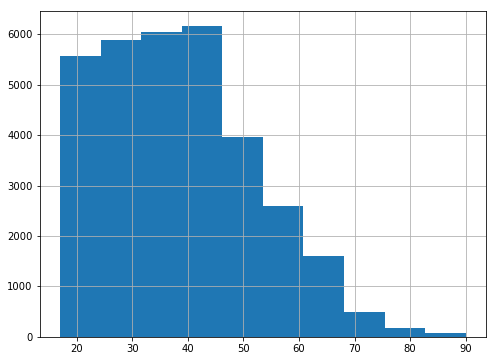

In [61]:
plt.figure(figsize=[8,6])
df["age"].hist()
plt.show()

In [62]:
df["age"].min()

17.0

In [63]:
df["age"].max()

90.0

In [64]:
df["nativecountry"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China',
       'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)',
       'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam',
       'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands', None], dtype=object)

#### There are people from 40 different countries. But there is people not identified tagged as "?", "South" or "None".

In [65]:
df["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       None], dtype=object)

#### There are 8 different working class.

In [66]:
df["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th', None], dtype=object)

#### There are 16 different education levels.

In [67]:
df["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', None], dtype=object)

#### There are people 14 different occupations.

In [68]:
df["nativecountry"].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [69]:
df["education"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [70]:
df["maritalstatus"].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: maritalstatus, dtype: int64

In [79]:
#We have deleted the last row because was completely empty
df = df.drop(df.index[[32561]])

#### We are going to delete many different columns that we are not going to use

In [81]:
df= df.drop('capitalloss', axis=1)

In [82]:
df= df.drop('fnlwgt', axis=1)

In [83]:
df= df.drop('educationnum', axis=1)

In [84]:
df= df.drop('capitalgain', axis=1)

In [85]:
df.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,income
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,<=50K
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,<=50K
3,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,<=50K
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,<=50K


In [86]:
df["age"].unique()

array([ 39.,  50.,  38.,  53.,  28.,  37.,  49.,  52.,  31.,  42.,  30.,
        23.,  32.,  40.,  34.,  25.,  43.,  54.,  35.,  59.,  56.,  19.,
        20.,  45.,  22.,  48.,  21.,  24.,  57.,  44.,  41.,  29.,  18.,
        47.,  46.,  36.,  79.,  27.,  67.,  33.,  76.,  17.,  55.,  61.,
        70.,  64.,  71.,  68.,  66.,  51.,  58.,  26.,  60.,  90.,  75.,
        65.,  77.,  62.,  63.,  80.,  72.,  74.,  69.,  73.,  81.,  78.,
        88.,  82.,  83.,  84.,  85.,  86.,  87.])

#### We are going to replace all the question marks found and write "unknown"

In [87]:
df["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'], dtype=object)

In [91]:
df ["workclass"] = df ["workclass"].replace(['?'], 'unknown')

In [93]:
df["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'unknown', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

In [88]:
df["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [89]:
df["maritalstatus"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed'], dtype=object)

In [90]:
df["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [94]:
df ["occupation"] = df ["occupation"].replace(['?'], 'unknown')

In [95]:
df["relationship"].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [96]:
df["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [97]:
df["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [98]:
df["hoursperweek"].unique()

array([ 40.,  13.,  16.,  45.,  50.,  80.,  30.,  35.,  60.,  20.,  52.,
        44.,  15.,  25.,  38.,  43.,  55.,  48.,  58.,  32.,  70.,   2.,
        22.,  56.,  41.,  28.,  36.,  24.,  46.,  42.,  12.,  65.,   1.,
        10.,  34.,  75.,  98.,  33.,  54.,   8.,   6.,  64.,  19.,  18.,
        72.,   5.,   9.,  47.,  37.,  21.,  26.,  14.,   4.,  59.,   7.,
        99.,  53.,  39.,  62.,  57.,  78.,  90.,  66.,  11.,  49.,  84.,
         3.,  17.,  68.,  27.,  85.,  31.,  51.,  77.,  63.,  23.,  87.,
        88.,  73.,  89.,  97.,  94.,  29.,  96.,  67.,  82.,  86.,  91.,
        81.,  76.,  92.,  61.,  74.,  95.])

In [99]:
df["nativecountry"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China',
       'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)',
       'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam',
       'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands'], dtype=object)

In [100]:
df ["nativecountry"] = df ["nativecountry"].replace(['?'], 'unknown')

In [101]:
#recalculate the mean and median of "age"

df["age"].mean()

38.58164675532078

In [102]:
df["age"].median()

37.0

#### with a database as big as this, one row does not make any significant changes

### mapping aproach of "age"

In [103]:
df.loc[(df['age'] >= 17) & (df['age'] <= 32), 'NumericAge'] = 0

In [104]:
df.loc[(df['age'] > 32) & (df['age'] <= 48), 'NumericAge'] = 1

In [105]:
df.loc[(df['age'] > 48) & (df['age'] <= 64), 'NumericAge'] = 2

In [106]:
df.loc[df['age'] > 64, 'NumericAge']= 3

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

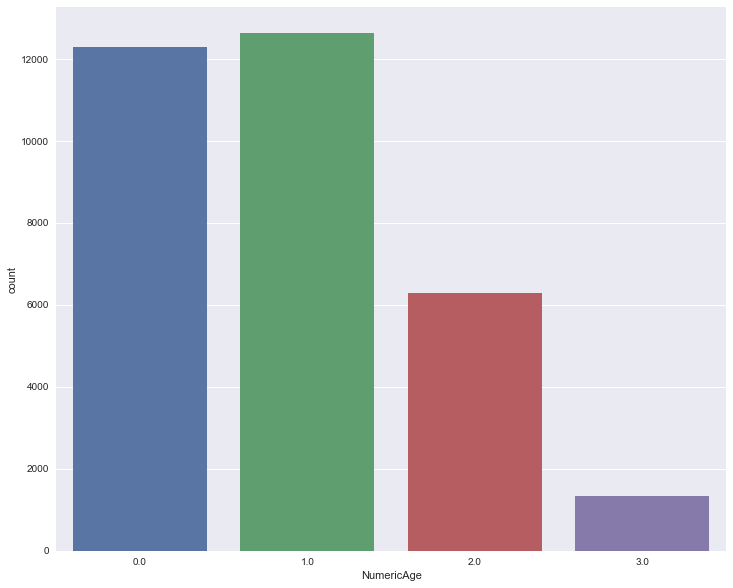

In [108]:
plt.figure(figsize=[12,10])
sns.countplot(df['NumericAge'])
plt.show()

In [110]:
df['CategoricalAge'] = pd.cut(df['age'], 4)

In [111]:
df['CategoricalAge']

0          (35.25, 53.5]
1          (35.25, 53.5]
2          (35.25, 53.5]
3          (35.25, 53.5]
4        (16.927, 35.25]
5          (35.25, 53.5]
6          (35.25, 53.5]
7          (35.25, 53.5]
8        (16.927, 35.25]
9          (35.25, 53.5]
10         (35.25, 53.5]
11       (16.927, 35.25]
12       (16.927, 35.25]
13       (16.927, 35.25]
14         (35.25, 53.5]
15       (16.927, 35.25]
16       (16.927, 35.25]
17       (16.927, 35.25]
18         (35.25, 53.5]
19         (35.25, 53.5]
20         (35.25, 53.5]
21         (53.5, 71.75]
22       (16.927, 35.25]
23         (35.25, 53.5]
24         (53.5, 71.75]
25         (53.5, 71.75]
26       (16.927, 35.25]
27         (53.5, 71.75]
28         (35.25, 53.5]
29         (35.25, 53.5]
              ...       
32531    (16.927, 35.25]
32532    (16.927, 35.25]
32533      (53.5, 71.75]
32534      (35.25, 53.5]
32535    (16.927, 35.25]
32536    (16.927, 35.25]
32537    (16.927, 35.25]
32538      (35.25, 53.5]
32539      (53.5, 71.75]


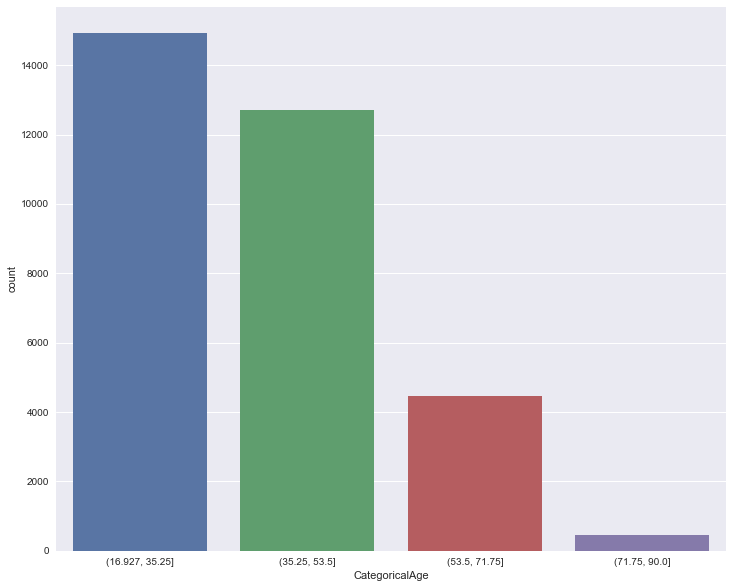

In [112]:
plt.figure(figsize=[12,10])
sns.countplot(df['CategoricalAge'])
plt.show()

# 1. Distribution of income by native country

In [114]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [115]:
df['income'] = df['income'].map( {'<=50K': 0, '>50K': 1} ).astype(int)

In [116]:
df.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,income,NumericAge,CategoricalAge
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,0,1.0,"(35.25, 53.5]"
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,0,2.0,"(35.25, 53.5]"
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,0,1.0,"(35.25, 53.5]"
3,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,0,2.0,"(35.25, 53.5]"
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,0,0.0,"(16.927, 35.25]"


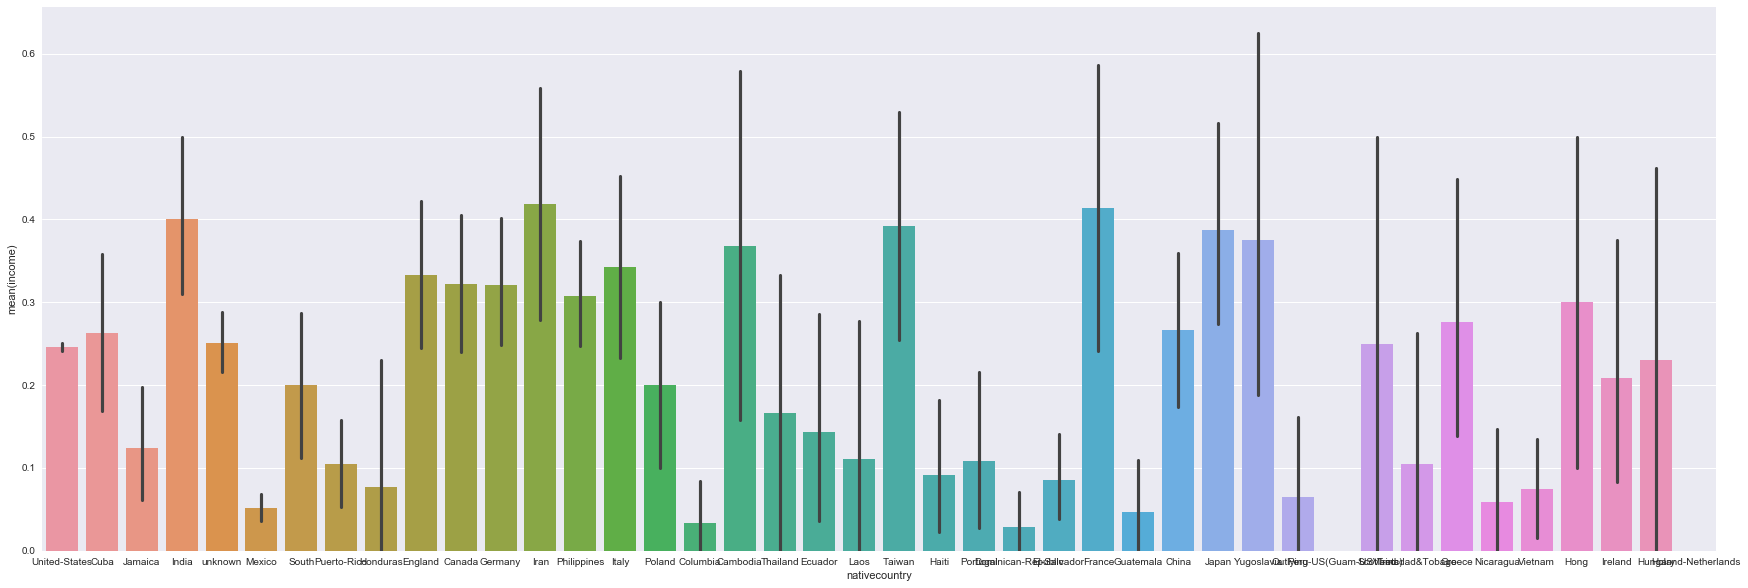

In [127]:
plt.figure(figsize=[30,10])
sns.barplot('nativecountry','income', data=df)

#show the plot
plt.show ()

# 2. Distribution of income by age

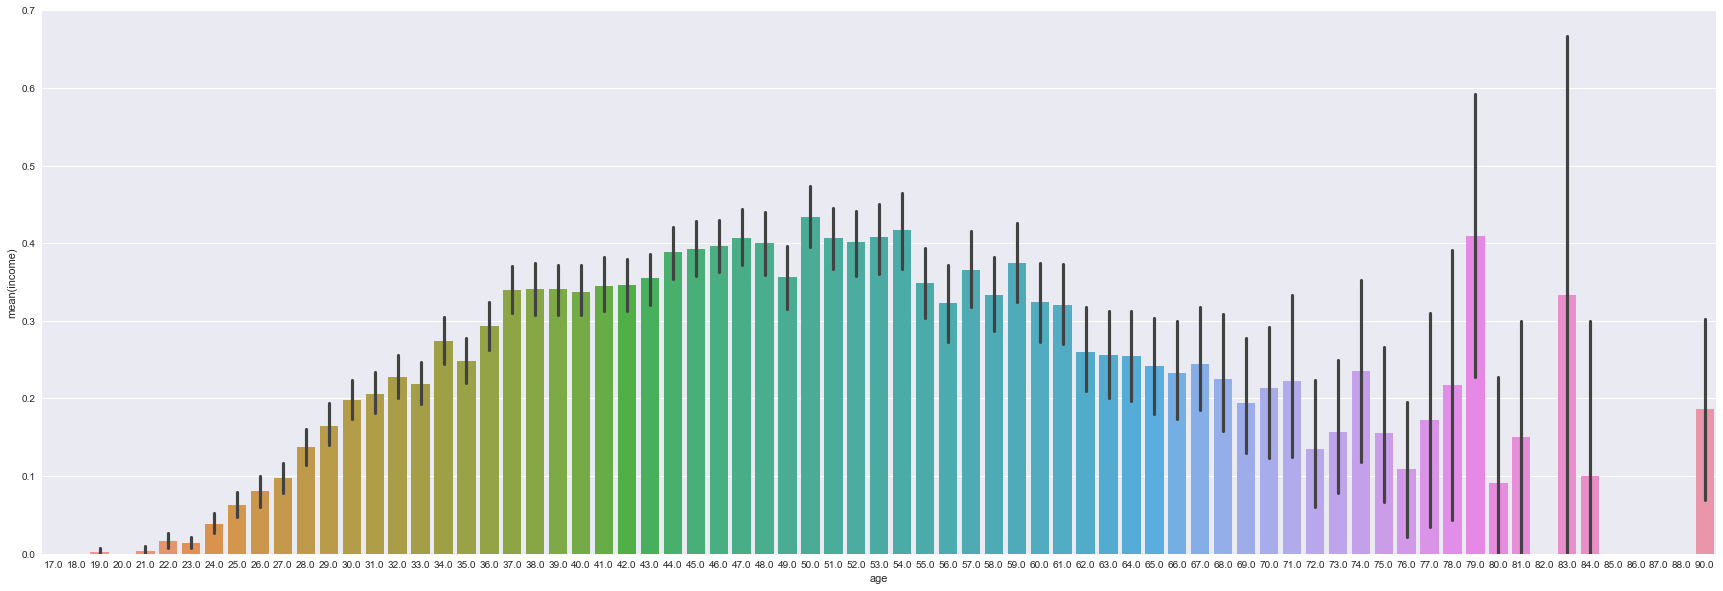

In [128]:
plt.figure(figsize=[30,10])
sns.barplot('age','income', data=df)

#show the plot
plt.show ()

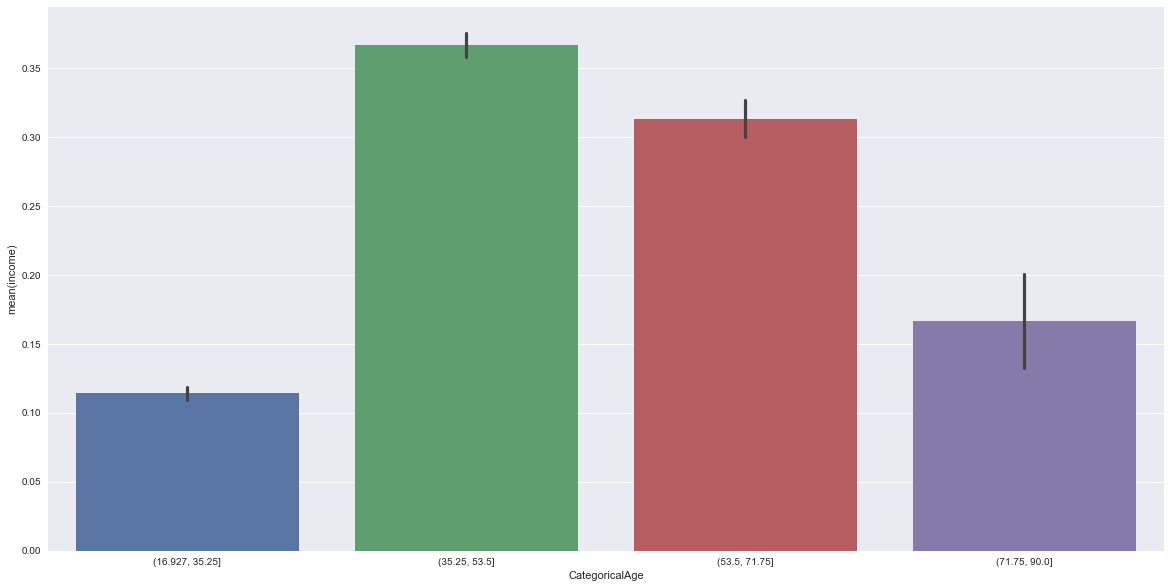

In [130]:
plt.figure(figsize=[20,10])
sns.barplot('CategoricalAge','income', data=df)

#show the plot
plt.show ()

# 3. Distribution of income by hours worked

In [134]:
df['Categoricalhoursperweek'] = pd.cut(df['hoursperweek'], 10)

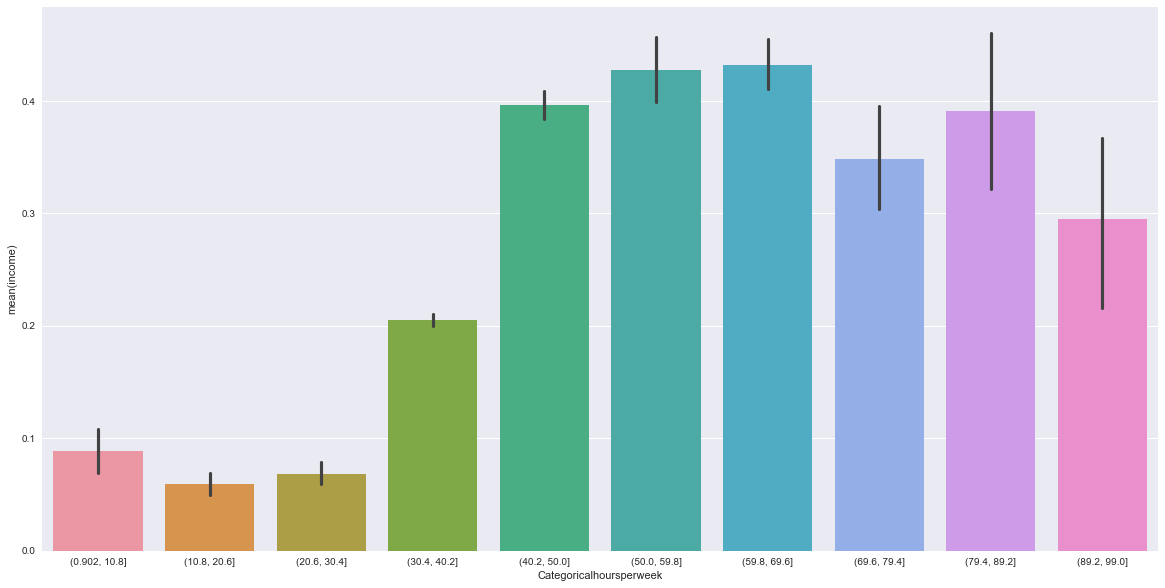

In [135]:
plt.figure(figsize=[20,10])
sns.barplot('Categoricalhoursperweek','income', data=df)

#show the plot
plt.show ()

# 4. Distribution of income by race

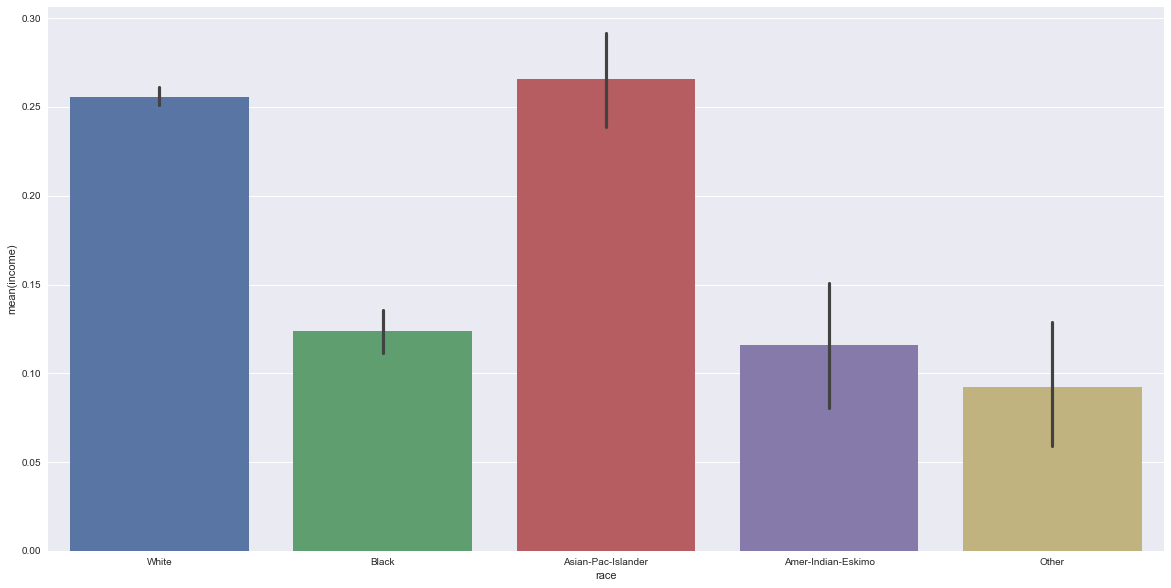

In [136]:
plt.figure(figsize=[20,10])
sns.barplot('race','income', data=df)

#show the plot
plt.show ()

In [ ]:
#### white people, and we understant that is people from 

In [140]:
df ['nativecountry'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'unknown', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China',
       'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)',
       'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam',
       'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands'], dtype=object)

In [142]:
df['nativecountry'] = df['nativecountry'].map( {'United-States': 0, 'Cuba':1 , 'Jamaica':1 , 'India'=1, 'unknown'=1, 'Mexico'=1,'South'=1, 'Puerto-Rico'=1, 'Honduras'=1, 'England'=1, 'Canada'=1, 'Germany'=1,'Iran'=1, 'Philippines'=1, 'Italy'=1, 'Poland'=1, 'Columbia'=1, 'Cambodia'=1,'Thailand'=1, 'Ecuador'=1, 'Laos'=1, 'Taiwan'=1, 'Haiti'=1, 'Portugal'=1,'Dominican-Republic'=1, 'El-Salvador'=1, 'France'=1, 'Guatemala'=1, 'China'=1,'Japan'=1, 'Yugoslavia'=1, 'Peru'=1, 'Outlying-US(Guam-USVI-etc)'=1,'Scotland'=1, 'Trinadad&Tobago'=1, 'Greece'=1, 'Nicaragua'=1, 'Vietnam'=1,'Hong'=1, 'Ireland'=1, 'Hungary'=1, 'Holand-Netherlands'=1} ).astype(int)

SyntaxError: invalid syntax (<ipython-input-142-5068ea462e95>, line 1)

In [139]:
plt.figure(figsize=[20,10])
sns.barplot('race','nativecountry', data=df)

#show the plot
plt.show ()

ValueError: Neither the `x` nor `y` variable appears to be numeric.

# 5. Distribution of income by occupation

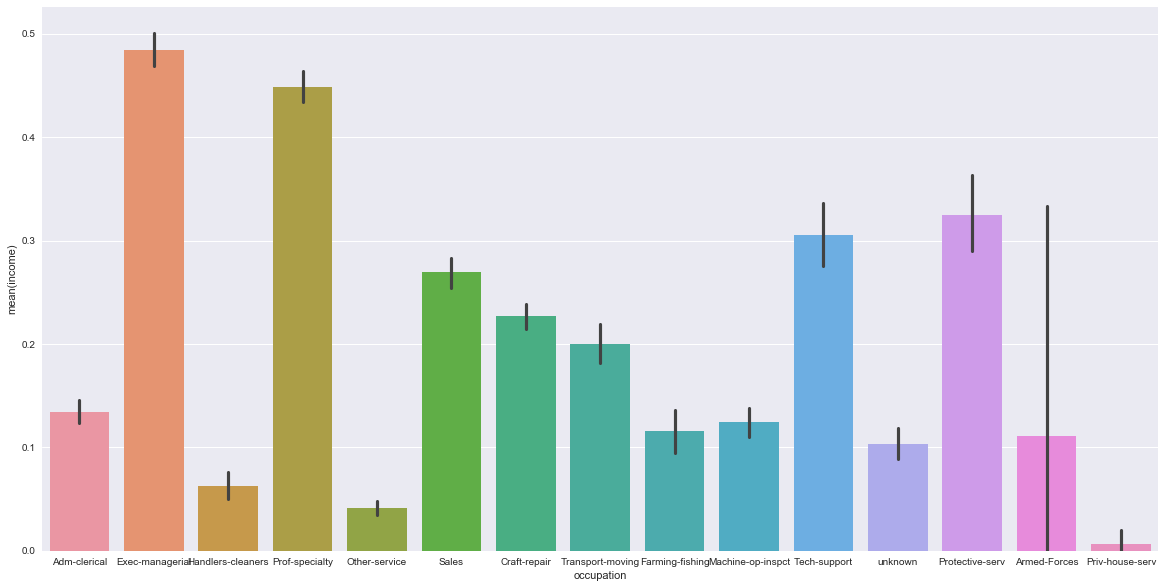

In [137]:
plt.figure(figsize=[20,10])
sns.barplot('occupation','income', data=df)

#show the plot
plt.show ()

# 6. Distribution of Income by Marital Status

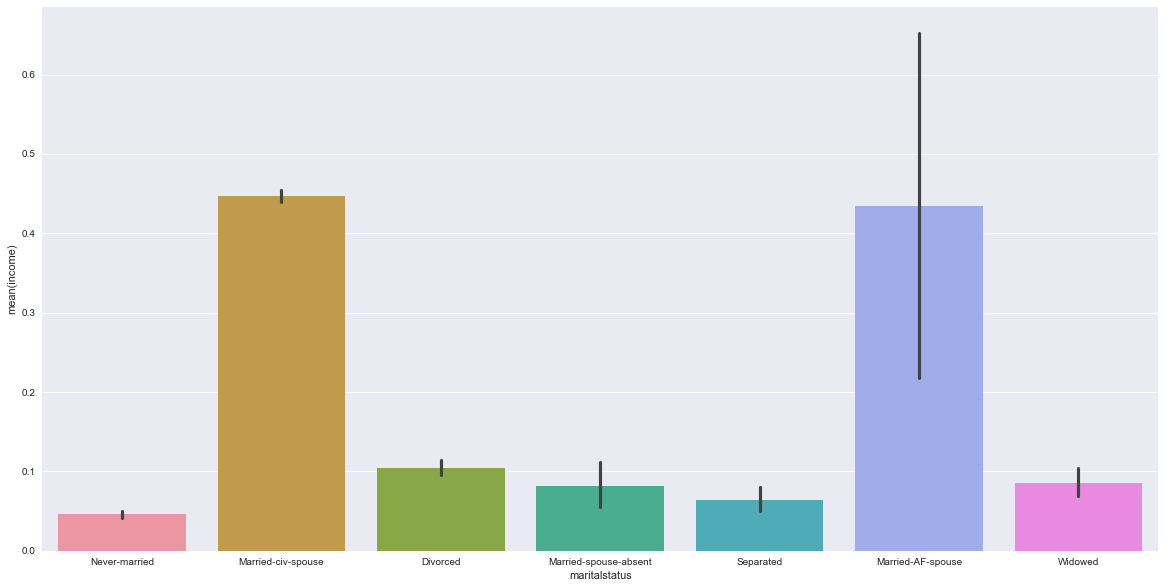

In [138]:
plt.figure(figsize=[20,10])
sns.barplot('maritalstatus','income', data=df)

#show the plot
plt.show ()

### Interesting to see how people with a stable family is used to earn more money.

# 7. Distribution of Income by sex. Who earns more money, males or females?

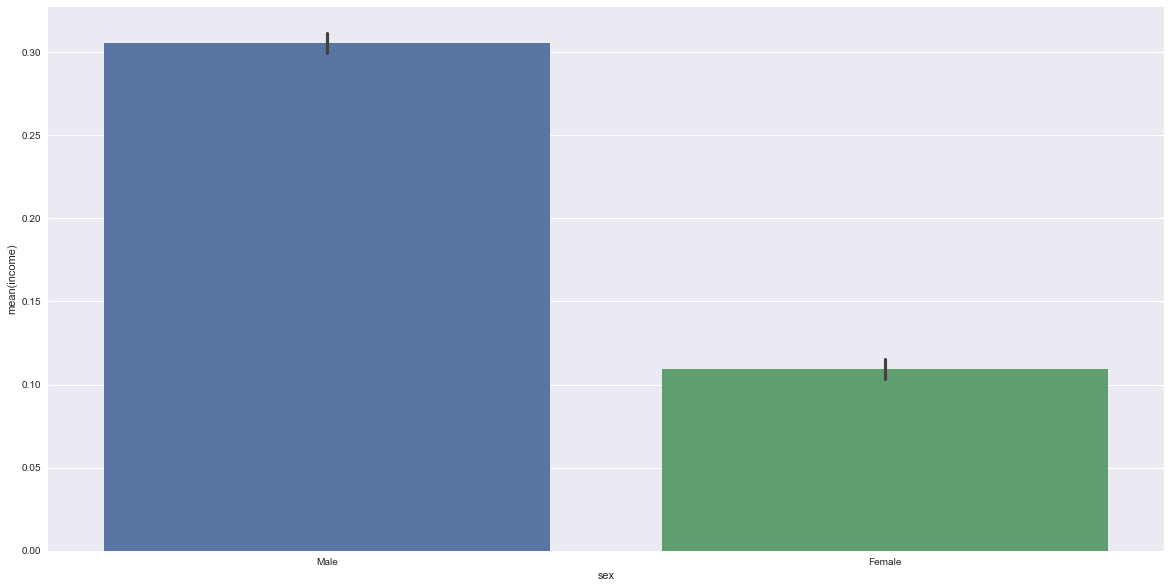

In [143]:
plt.figure(figsize=[20,10])
sns.barplot('sex','income', data=df)

#show the plot
plt.show ()

### Males earn more money without a doubt.

# 8. Relation between Income and Workclass. Which is the workclass better rewarded?

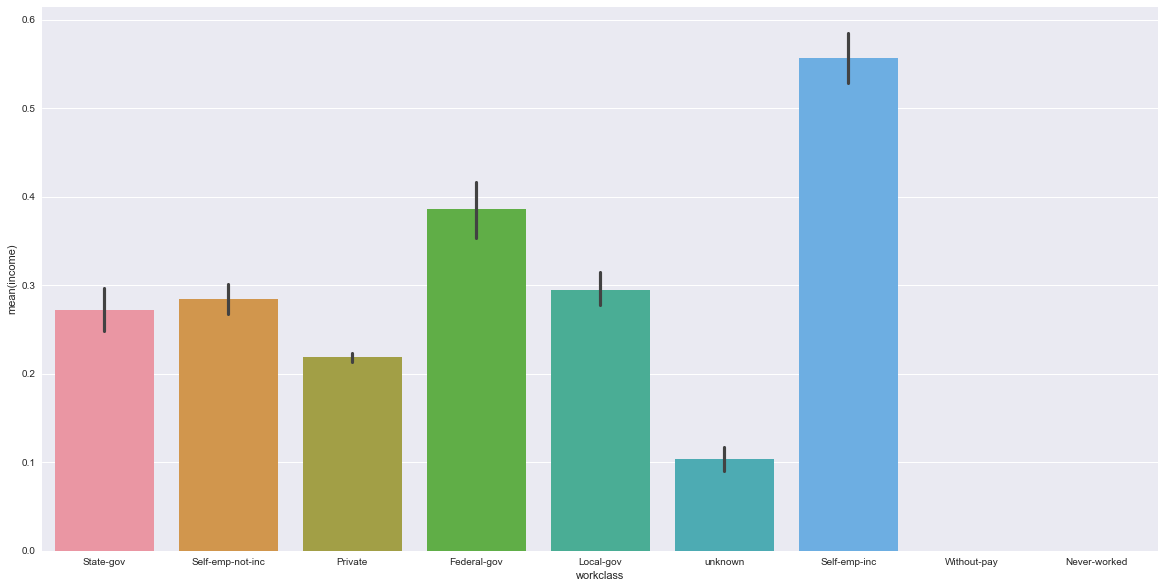

In [144]:
plt.figure(figsize=[20,10])
sns.barplot('workclass','income', data=df)

#show the plot
plt.show ()

### self-employed in the first place and people working by the federal government

# 9. Which Native Country work more hours?

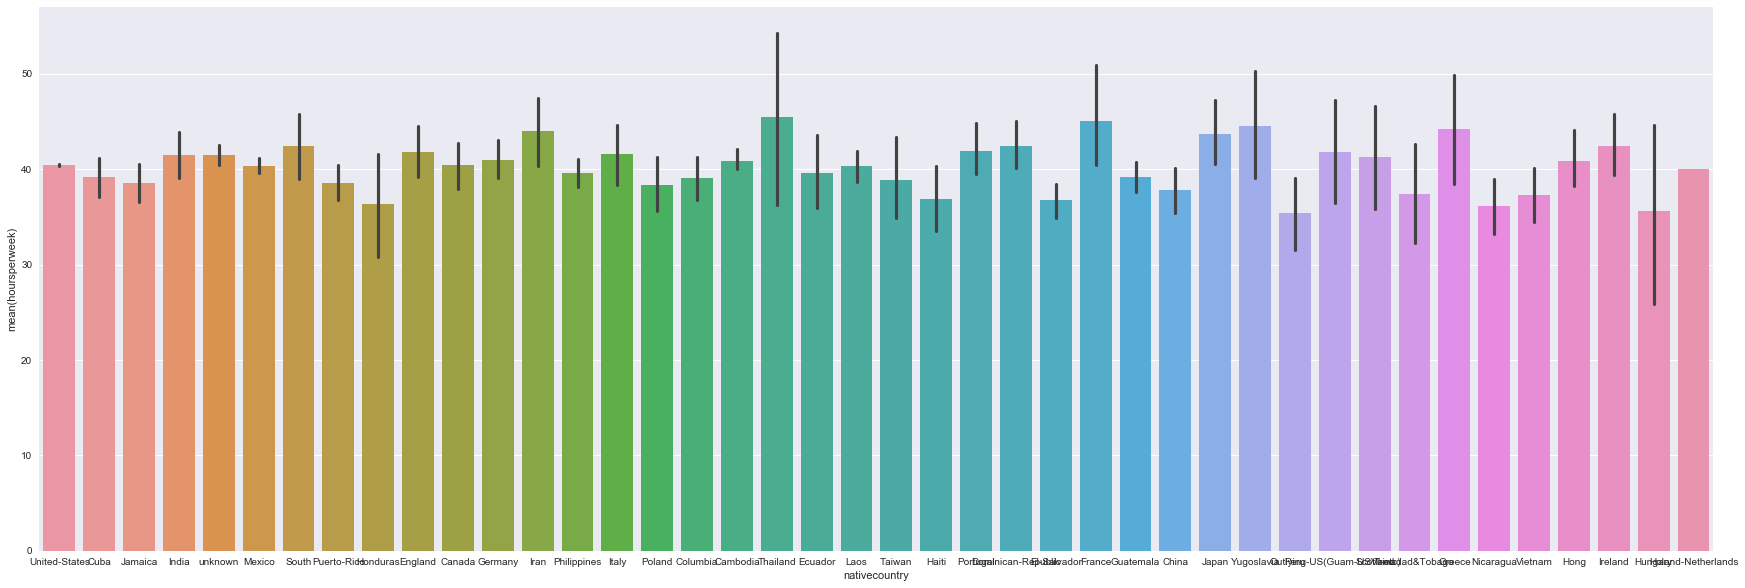

In [150]:
plt.figure(figsize=[30,10])
sns.barplot('nativecountry','hoursperweek', data=df)

#show the plot
plt.show ()

### Thailand is the country who spends more hours per week working.

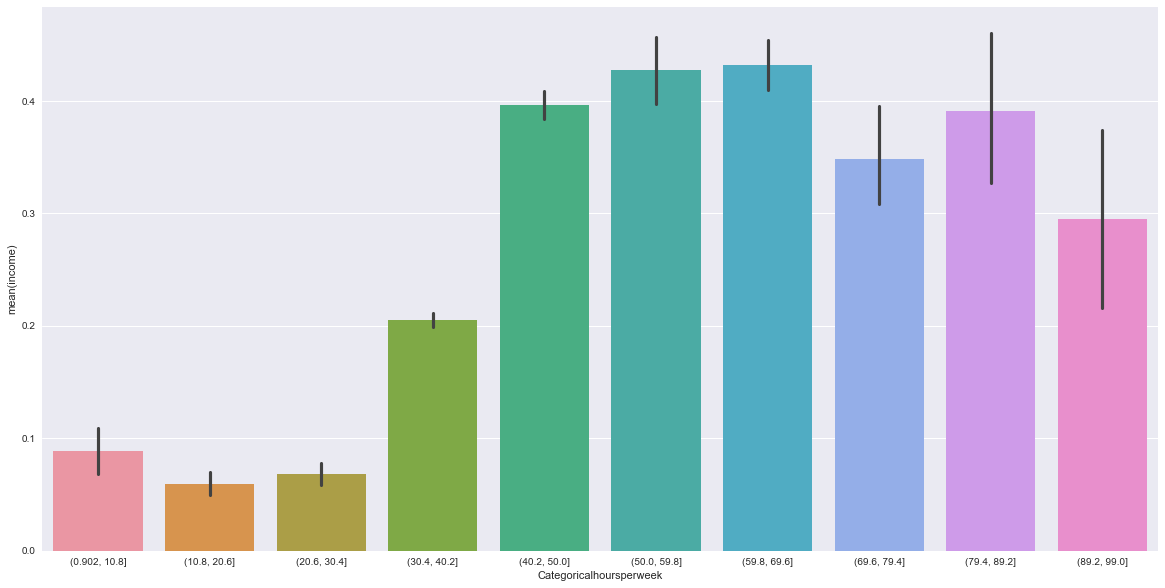

In [148]:
plt.figure(figsize=[20,10])
sns.barplot('Categoricalhoursperweek','income', data=df)

#show the plot
plt.show ()

### until 70hours per week worked, you can earn as much you work.

# 10. Relation between hours worked and sex.

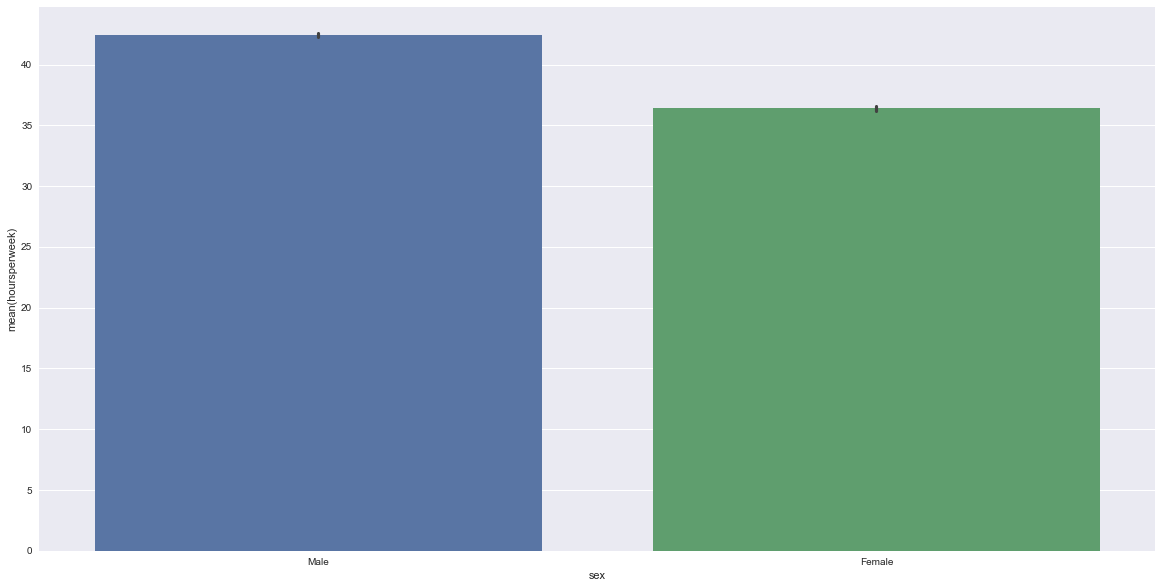

In [152]:
plt.figure(figsize=[20,10])
sns.barplot('sex','hoursperweek', data=df)

#show the plot
plt.show ()

### males are used to work more time than females in the strictly hours of work.

# 11. Relation between occupation and working hours

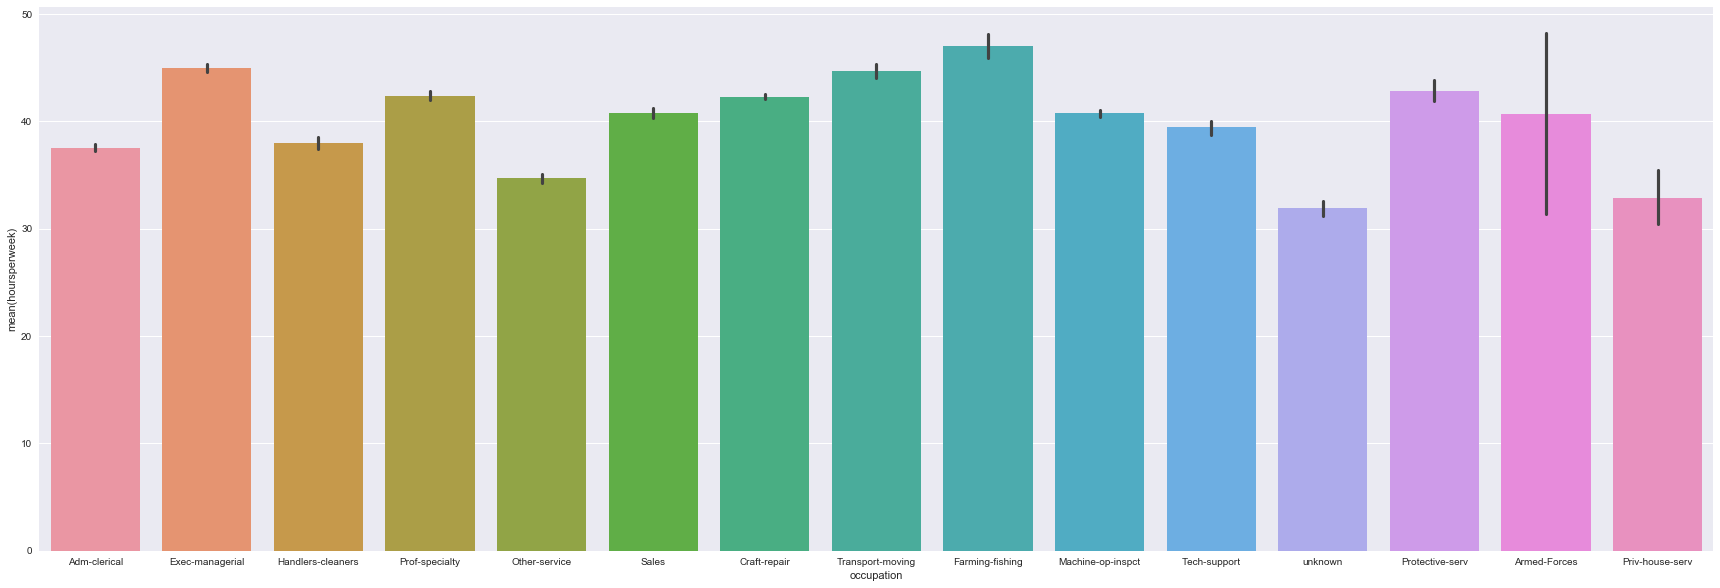

In [153]:
plt.figure(figsize=[30,10])
sns.barplot('occupation','hoursperweek', data=df)

#show the plot
plt.show ()

# 12. Relation between Education and Marital Status

In [156]:
df['maritalstatus'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed'], dtype=object)

In [158]:
df['maritalstatus'] = df['maritalstatus'].map( {'Never-married': 0, 'Married-civ-spouse': 1, 'Divorced':2, 'Married-spouse-absent':3, 'Separated':4, 'Married-AF-spouse':5, 'Widowed':6} ).astype(int)

In [ ]:
plt.figure(figsize=[12,10])
sns.swarmplot (x='education', y='maritalstatus', data=df)
plt.show()

# 13. Relation between education and race

In [ ]:
plt.figure(figsize=[30,10])
sns.barplot('education','race', data=df)

#show the plot
plt.show ()

# 14. Relation between education and sex

# 15. Relation between occupation and race

# 16. Relation between occupation and sex

# 17. Relation between workclass and sex.

# 18. Relation between workclass and race.

# 19. Relation between marital status and race.

# 20. Relation between marital status and age

# 21. Relation between marital status and occupation.